In [15]:
import numpy as np
from skimage import io
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt
from skimage.transform import resize

In [16]:
noisy_img = io.imread ("/Users/jiyoung/Desktop/univ/'23-2/Engineering Design/workspace/dog_noisy.png")
clean_img = io.imread ("/Users/jiyoung/Desktop/univ/'23-2/Engineering Design/workspace/dog.png")

In [17]:
# Gaussian Filter
def gaussian_kernel(k_size, sigma):
    size = k_size//2
    y, x = np.ogrid[-size:size+1, -size:size+1]
    filter = 1/(2*np.pi * (sigma**2)) * np.exp(-1 *(x**2 + y**2) /(2*(sigma**2)))
    sum = filter.sum()
    filter /= sum
    return filter

In [19]:
def bilateral_filter(noisy_img, k_size=5, sigma_space=4, sigma_intensity=0.5):
    h, w, ch = noisy_img.shape
    bilateral_noisy_img = np.zeros((h, w, ch))
    
    for c in range(ch):
        # 공간적인 가우시안 필터
        spatial_filter = gaussian_kernel(k_size, sigma_space)
        
        for i in range(h):
            for j in range(w):
                intensity_center = noisy_img[i, j, c]
                
                weighted_sum = 0.0
                normalization_factor = 0.0
                
                for m in range(-k_size//2, k_size//2 + 1):
                    for n in range(-k_size//2, k_size//2 + 1):
                        i_neighbor = i + m
                        j_neighbor = j + n
                        
                        if 0 <= i_neighbor < h and 0 <= j_neighbor < w:
                            intensity_neighbor = noisy_img[i_neighbor, j_neighbor, c]
                            
                            # 강도 차이에 대한 가중치
                            weight_intensity = np.exp(-(intensity_center - intensity_neighbor)**2 / (2 * sigma_intensity**2))
                            
                            # 공간적인 가우시안 필터 적용
                            weight_spatial = spatial_filter[m + k_size//2, n + k_size//2]
                            
                            # 각 픽셀에 대한 가중치를 누적
                            weight = weight_intensity * weight_spatial
                            weighted_sum += intensity_neighbor * weight
                            normalization_factor += weight
                
                # 정규화된 결과를 저장
                bilateral_noisy_img[i, j, c] = weighted_sum / normalization_factor
    
    return bilateral_noisy_img

# Bilateral Filter
bilateral_noisy_img = bilateral_filter(noisy_img)
print("Bilateral Filter PSNR: ", peak_signal_noise_ratio(clean_img, bilateral_noisy_img))

/var/folders/n1/t3hm6b612gg69mlfjrdv4ht00000gn/T/ipykernel_98199/498623759.py:25: RuntimeWarning: overflow encountered in ubyte_scalars
  weight_intensity = np.exp(-(intensity_center - intensity_neighbor)**2 / (2 * sigma_intensity**2))


Bilateral Filter PSNR:  15.650525730176742


/var/folders/n1/t3hm6b612gg69mlfjrdv4ht00000gn/T/ipykernel_98199/498623759.py:42: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("Bilateral Filter PSNR: ", peak_signal_noise_ratio(clean_img, bilateral_noisy_img))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


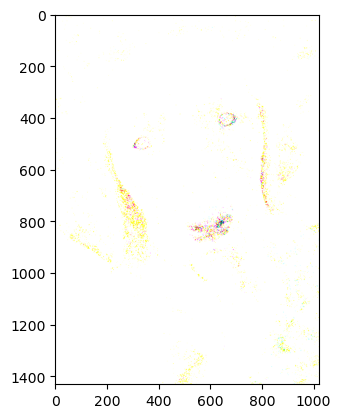

In [14]:
# Median Filter
def median_filter(noisy_img, filter_size=(3, 3), stride=1):
    img_shape = np.shape(noisy_img)
    result_shape = tuple(np.int64((np.array(img_shape[:2]) - np.array(filter_size)) / stride) + 1) + (img_shape[2],)
    result = np.zeros(result_shape)

    for h in range(0, result_shape[0], stride):
        for w in range(0, result_shape[1], stride):
            for c in range(img_shape[2]):
                tmp = noisy_img[h:h + filter_size[0], w:w + filter_size[1], c].ravel()
                tmp = np.sort(tmp)
                result[h, w, c] = tmp[int(len(tmp) / 2)]

    return result

# median_filtered_image = median_filter(bilateral_noisy_img)
# # #plt.imsave('median_filtered_image.png', median_filtered_image)
# plt.imshow(median_filtered_image)
# print("Median Filter PSNR: ", peak_signal_noise_ratio(clean_img, median_filtered_image))

median_filtered_img = median_filter(bilateral_noisy_img)
median_img_resized = resize ( median_filtered_img, clean_img.shape, mode = 'constant', anti_aliasing=True )
print("Median Filter PSNR: ", peak_signal_noise_ratio(clean_img, median_img_resized))